findfont: Font family 'Helvetica' not found.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


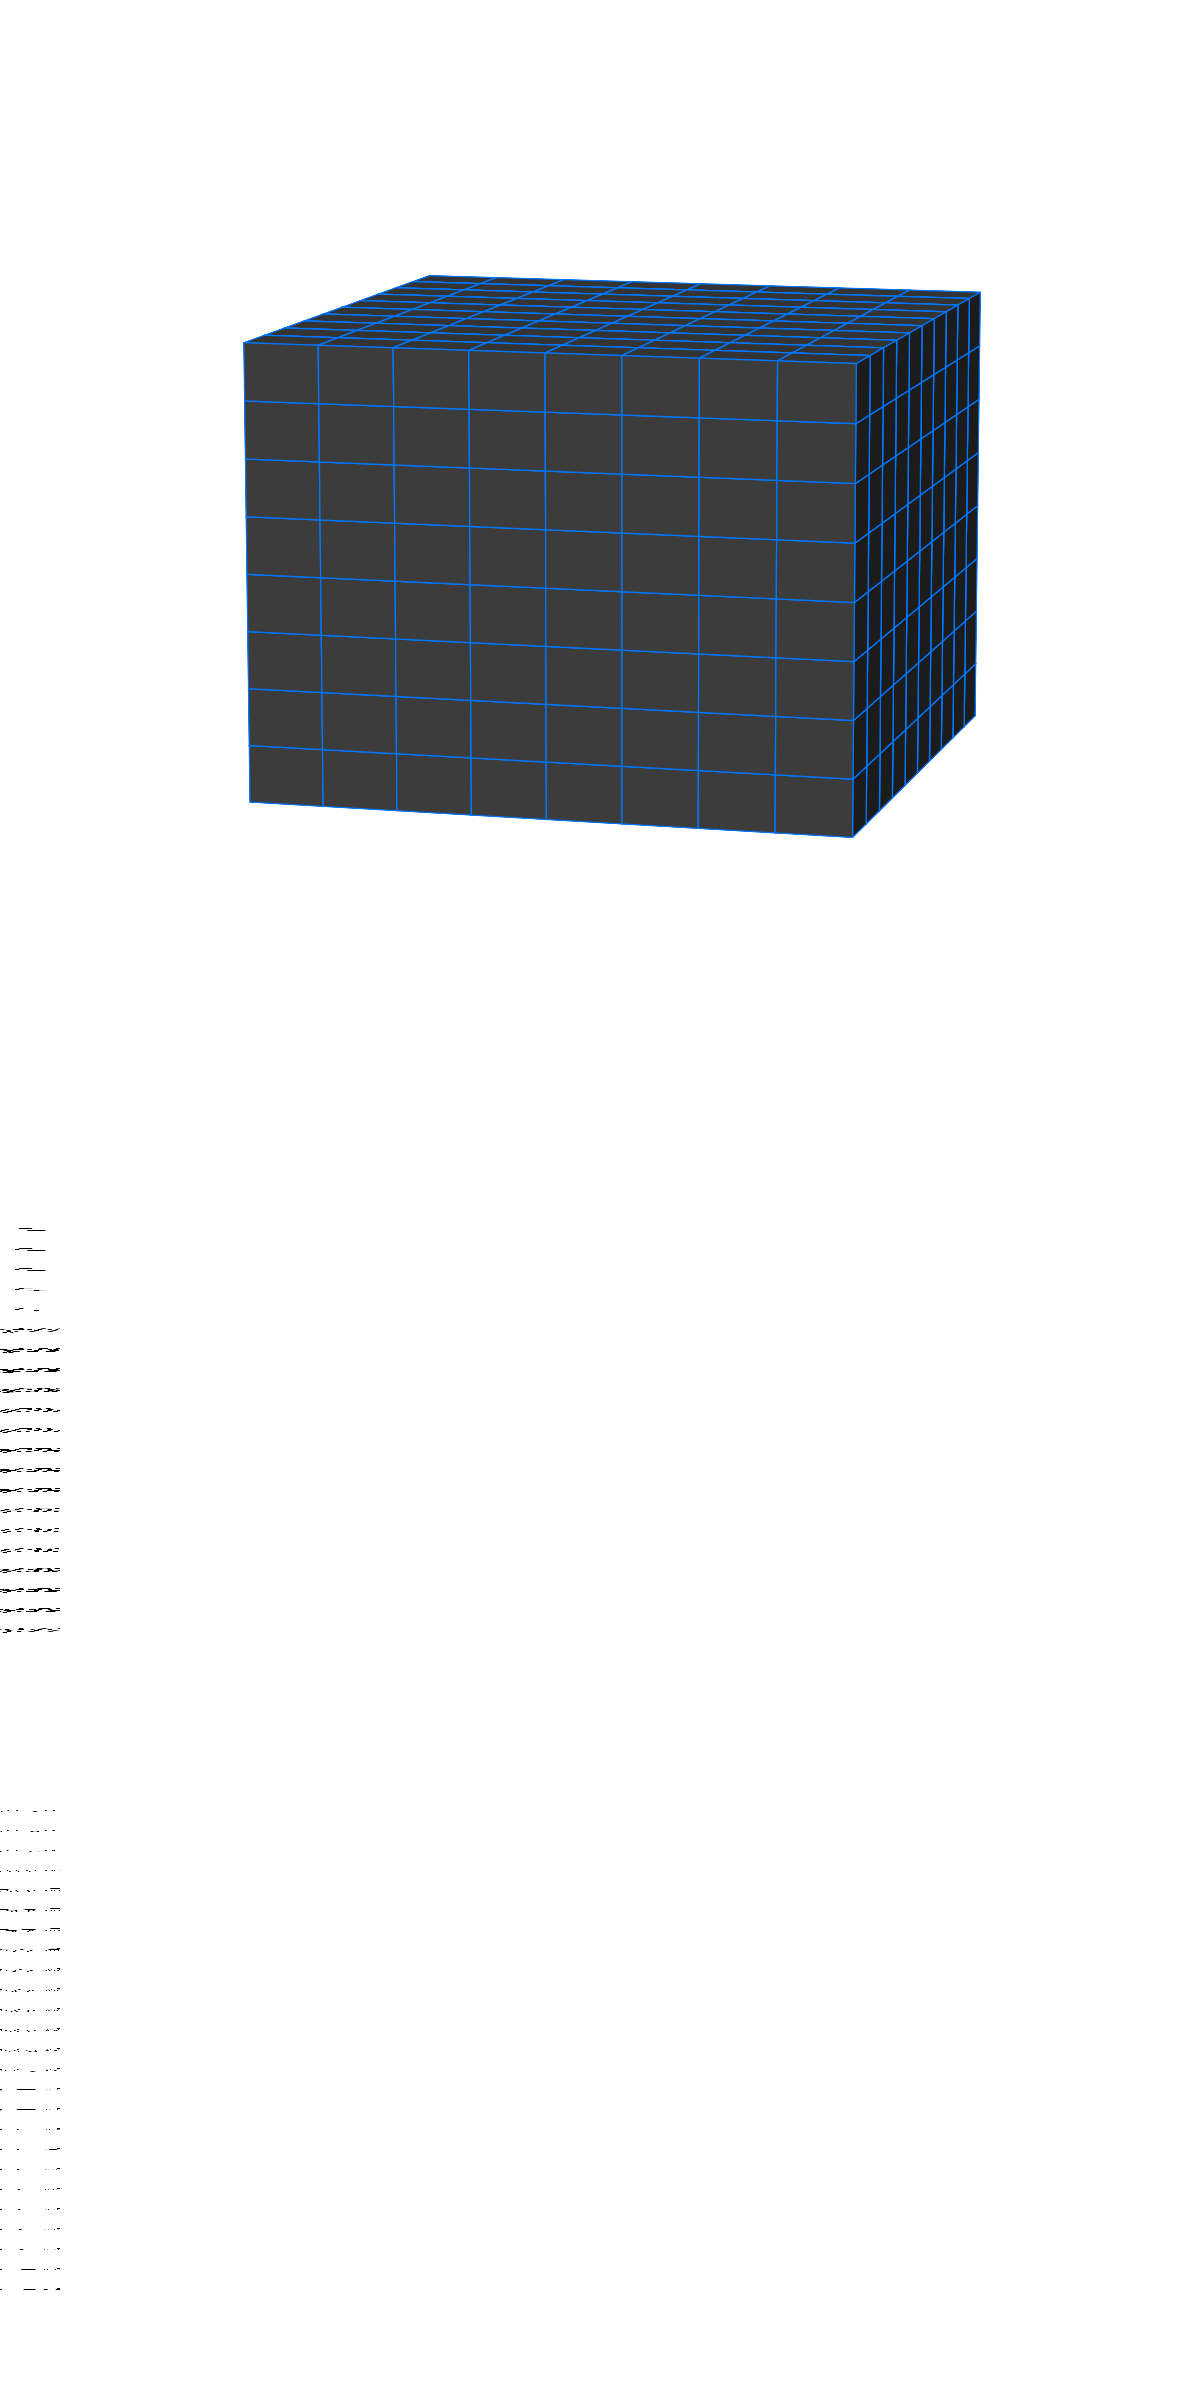

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from PIL import Image

def draw_tensor_cube_image(feature_size=(10, 8, 8), color='#444444', edge_color='#0077ff',
                           output_path='tensor_cube_rgba.png',
                           title='Feature Tensor', math_expr=r"$\mathbf{T} \in \mathbb{R}^{H \times W \times C}$",
                           font_size=20):
    H, W, C = feature_size

    # --- Tạo figure chính vẽ khối ---
    fig = plt.figure(figsize=(4, 4), dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    for z in range(C):
        for y in range(H):
            for x in range(W):
                ax.bar3d(x, y, -z, 1, 1, 1, shade=True, color=color, edgecolor=edge_color, linewidth=0.6, alpha=1.0)

    ax.set_axis_off()
    ax.set_xlim(0, W)
    ax.set_ylim(0, H)
    ax.set_zlim(-C, 0)
    ax.view_init(elev=10, azim=-75, roll=0)
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)

    # --- Render figure chính thành ảnh ---
    fig.canvas.draw()
    img_data = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
    w, h = fig.canvas.get_width_height()
    img_data = img_data.reshape((h, w, 4))
    img_data = np.roll(img_data, -1, axis=2)  # ARGB → RGBA
    cube_img = Image.fromarray(img_data, "RGBA")
    plt.close(fig)

    # --- Tạo caption bằng matplotlib ---
    caption_height = font_size * 3
    fig2, ax2 = plt.subplots(figsize=(w / 100, caption_height / 100), dpi=100)
    fig2.patch.set_alpha(0.0)
    ax2.axis("off")

    title_latex = title.replace(" ", r"\ ")
    ax2.text(0.5, 0.55, rf"$\mathbf{{{title_latex}}}$", fontsize=font_size, ha="center", va="bottom", weight="bold", family="Helvetica")
    ax2.text(0.5, 0.45, math_expr, fontsize=font_size, ha="center", va="top", weight="bold", family="Helvetica")

    fig2.canvas.draw()
    caption_img = np.frombuffer(fig2.canvas.tostring_argb(), dtype=np.uint8)
    ch, cw = fig2.canvas.get_width_height()
    caption_img = caption_img.reshape((ch, cw, 4))
    caption_img = np.roll(caption_img, -1, axis=2)
    caption_pil = Image.fromarray(caption_img, "RGBA")
    plt.close(fig2)

    # --- Kết hợp cube và caption ---
    combined = Image.new("RGBA", (w, h + ch), (255, 255, 255, 0))
    combined.paste(cube_img, (0, 0), cube_img)
    combined.paste(caption_pil, (0, h), caption_pil)

    combined.save(output_path)
    combined.show()

# Gọi hàm ví dụ
draw_tensor_cube_image()



### Ảnh tensor

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_tensor_cube_image(feature_size=(10, 8, 8), color='#444444', edge_color='#0077ff', output_path='tensor_cube_rgba.png'):
    H, W, C = feature_size  # height, width, channels (depth)

    fig = plt.figure(figsize=(4, 4), dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    for z in range(C):
        for y in range(H):
            for x in range(W):
                ax.bar3d(x, y, -z, 1, 1, 1, shade=True, color=color, edgecolor=edge_color, linewidth=0.6, alpha=1.0)

    # Thêm công thức toán học vào hình
    ax.text2D(0.05, 0.95, r"$\mathbf{T} \in \mathbb{R}^{H \times W \times C}$", 
              transform=ax.transAxes, fontsize=10, color='black')

    ax.set_axis_off()
    ax.set_xlim(0, W)
    ax.set_ylim(0, H)
    ax.set_zlim(-C, 0)
    ax.view_init(elev=10, azim=-75, roll=0)

    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)
    plt.tight_layout()
    plt.savefig(output_path, transparent=True)

    plt.show()  # ← Thêm dòng này để hiển thị hình ảnh ngay
    plt.close(fig)

# Gọi hàm
draw_tensor_cube_image()


### Ảnh thường

In [2]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

def add_caption_below_image(image_path, output_path, title="Image Title", math_expr=r"$\mathbf{I}_{raw}$", font_size=22, padding=20):
    # Load ảnh RGBA
    img = Image.open(image_path).convert("RGBA")
    W, H = img.size

    # Tạo canvas mới cao hơn ảnh gốc để thêm text bên dưới
    extra_height = font_size *3 + padding
    new_img = Image.new("RGBA", (W, H + extra_height), (255, 255, 255, 0))
    new_img.paste(img, (0, 0))

    # Tạo caption bằng matplotlib
    fig, ax = plt.subplots(figsize=(W / 100, extra_height / 100), dpi=100)
    fig.patch.set_alpha(0.0)
    ax.axis("off")

    # Xử lý khoảng trắng trong title cho LaTeX
    title_latex = title.replace(" ", r"\ ")

    ax.text(0.5, 0.55, rf"$\mathbf{{{title_latex}}}$", fontsize=font_size, ha="center", va="bottom", weight="bold", family="Helvetica")
    ax.text(0.5, 0.45, math_expr, fontsize=font_size, ha="center", va="top", weight="bold", family="Helvetica")

    fig.canvas.draw()

    # Convert từ matplotlib figure sang ảnh RGBA
    caption_img = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
    caption_img = caption_img.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    caption_img = np.roll(caption_img, -1, axis=2)  # ARGB -> RGBA
    caption_pil = Image.fromarray(caption_img, "RGBA")
    plt.close(fig)

    # Dán phần caption vào ảnh chính
    new_img.paste(caption_pil, (0, H), caption_pil)

    # Lưu ảnh
    new_img.save(output_path)
    return new_img

# # Gọi hàm và show
# add_caption_below_image(
#     image_path="output/support_label.png",
#     output_path="u_draw_qsm/support_label.png",
#     title="Support label",
#     math_expr=r"$\mathbf{y}_s^{(p)}$"
# ).show()


### Công thức toán

findfont: Font family 'Helvetica' not found.


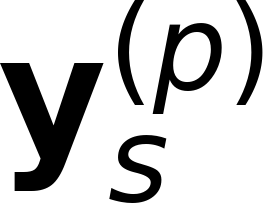

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def render_math_expression_to_transparent_image(math_expr, output_path="math_expr.png", font_size=36, dpi=300, padding=20):
    """
    Tạo ảnh PNG trong suốt từ biểu thức LaTeX.
    """
    # Tạo figure
    fig, ax = plt.subplots(figsize=(4, 1), dpi=dpi)
    fig.patch.set_alpha(0.0)
    ax.axis("off")

    # Thêm biểu thức LaTeX
    ax.text(0.5, 0.5, math_expr, fontsize=font_size, ha="center", va="center", weight="bold", family="Helvetica")

    # Render canvas
    fig.canvas.draw()

    # Lấy dữ liệu ảnh RGBA
    img_data = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
    w, h = fig.canvas.get_width_height()
    img_data = img_data.reshape((h, w, 4))
    img_data = np.roll(img_data, -1, axis=2)  # ARGB -> RGBA

    # Chuyển thành ảnh PIL
    img_pil = Image.fromarray(img_data, "RGBA")

    # Cắt bỏ phần thừa trắng xung quanh (crop tight)
    bbox = img_pil.getbbox()
    if bbox:
        img_pil = img_pil.crop(bbox)

    # Lưu và hiển thị ảnh
    img_pil.save(output_path)
    # img_pil.show()

    # Đóng figure để tránh memory leak
    plt.close(fig)
    return img_pil
render_math_expression_to_transparent_image(
    math_expr=r"$\mathbf{y}_s^{(p)}$",
    output_path="u_draw_qsm/symbol_support_label.png",
    font_size=40
)


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import transforms
from PIL import Image
import numpy as np
import io
from matplotlib.transforms import Bbox

def add_caption_below_image(image_path, output_path, title="Image Title", math_expr=r"$\mathbf{I}_{raw}$", font_size=22, padding=20):
    # Load ảnh RGBA
    img = Image.open(image_path).convert("RGBA")
    W, H = img.size

    # Tạo caption bằng matplotlib trước để đo kích thước
    fig, ax = plt.subplots(figsize=(10, 2), dpi=100)
    fig.patch.set_alpha(0.0)
    ax.axis("off")

    # Xử lý khoảng trắng trong title cho LaTeX
    title_latex = title.replace(" ", r"\ ")
    title_obj = ax.text(0.5, 0.55, rf"$\mathbf{{{title_latex}}}$", fontsize=font_size,
                        ha="center", va="bottom", weight="bold", family="Helvetica", transform=ax.transAxes)
    math_obj = ax.text(0.5, 0.45, math_expr, fontsize=font_size,
                       ha="center", va="top", weight="bold", family="Helvetica", transform=ax.transAxes)

    fig.canvas.draw()
    bbox1 = title_obj.get_window_extent()
    bbox2 = math_obj.get_window_extent()
    bbox = Bbox.union([bbox1, bbox2])
    bbox_inches = bbox.transformed(fig.dpi_scale_trans.inverted())

    text_width = int(bbox_inches.width * fig.dpi)
    caption_height = int(bbox_inches.height * fig.dpi)


    plt.close(fig)

    # Nếu caption dài hơn ảnh → mở rộng ảnh chính
    final_width = max(W, text_width + padding * 2)
    extra_height = caption_height + padding
    new_img = Image.new("RGBA", (final_width, H + extra_height), (255, 255, 255, 0))
    new_img.paste(img, ((final_width - W) // 2, 0))  # Center ảnh gốc

    # Vẽ lại caption với đúng kích thước
    fig, ax = plt.subplots(figsize=(final_width / 100, extra_height / 100), dpi=100)
    fig.patch.set_alpha(0.0)
    ax.axis("off")

    ax.text(0.5, 0.55, rf"$\mathbf{{{title_latex}}}$", fontsize=font_size,
            ha="center", va="bottom", weight="bold", family="Helvetica")
    ax.text(0.5, 0.45, math_expr, fontsize=font_size,
            ha="center", va="top", weight="bold", family="Helvetica")

    fig.canvas.draw()

    caption_img = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
    caption_img = caption_img.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    caption_img = np.roll(caption_img, -1, axis=2)  # ARGB -> RGBA
    caption_pil = Image.fromarray(caption_img, "RGBA")
    plt.close(fig)

    # Dán caption xuống dưới
    new_img.paste(caption_pil, (0, H), caption_pil)

    # Lưu ảnh
    new_img.save(output_path)
    return new_img


def draw_tensor_cube_channel_depth(
    image_path="tensor_raw.png",
    feature_size=(10, 8, 8),
    color='#DAE8FC',
    edge_color='#00FFFF',
    highlight_indices=None,
    highlight_color="#FF0000",
    simple=False
):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np

    if highlight_indices is None:
        highlight_indices = []

    H, W, C = feature_size
    fig = plt.figure(figsize=(3, 3), dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    highlight_hw = set((h, w) for (h, w) in highlight_indices)

    if simple:
        # Chỉ vẽ một thanh duy nhất 1x1xC
        if any(i in highlight_indices for i in range(C)):
            ax.bar3d(
                0, 0, 0,
                1, C, 1,
                color=highlight_color,
                edgecolor='black',
                linewidth=0.6,
                alpha=1.0,
                shade=False
            )
        else:
            ax.bar3d(
                0, 0, 0,
                1, C, 1,
                color=color,
                edgecolor=edge_color,
                linewidth=0.6,
                alpha=1.0,
                shade=False
            )
    else:
        # Mỗi điểm (h, w) là một thanh có độ sâu là C
        for h in range(H):
            for w in range(W):
                is_highlighted = (h, w) in highlight_hw
                ax.bar3d(
                    w, 0, h,
                    1, C, 1,  # Chiều cao theo trục y = C
                    color=highlight_color if is_highlighted else color,
                    edgecolor=edge_color,
                    linewidth=0.6,
                    alpha=1.0,
                    shade=False
                )

    ax.set_xlim(0, W)
    ax.set_ylim(0, C)
    ax.set_zlim(0, H)
    ax.set_box_aspect([W, C, H])
    ax.view_init(elev=10, azim=-65)
    ax.set_axis_off()
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    plt.savefig(image_path, transparent=True, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    crop_to_content(image_path, image_path)



def crop_to_content(image_path, output_path=None):
    img = Image.open(image_path).convert("RGBA")
    bbox = img.getbbox()
    if bbox:
        cropped_img = img.crop(bbox)
        if output_path:
            cropped_img.save(output_path)
    else:
        pass

# draw_tensor_cube_channel_depth(
#     image_path="img.png",
#     feature_size=(8, 8, 10),  # H=4, W=5, C=6
#     simple=False,
#     highlight_indices=[(2, 1), (0, 4)],
#     highlight_color="#F8CECC"
# )


findfont: Font family 'Helvetica' not found.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Helvetica' not found.


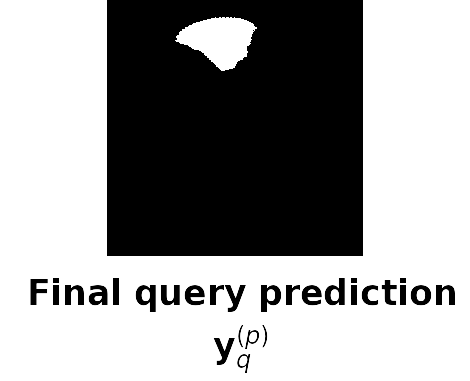

In [4]:
# xám: #647687
# cạnh xanh: #B1DDF0

# hồng nhạt: #F8CECC
# xanh nhạt: #DAE8FC

# hồng đậm: #D80073
# xanh đậm: #1BA1E2

draw_tensor_cube_channel_depth(
    image_path="img.png",
    feature_size=(1, 1, 10),
    color='#9AC2FF',
    edge_color='#B1DDF0',
    # highlight_indices=[(4,1), (4, 2), (4, 3), (5, 2),(5,3), (6, 3)],
    
    highlight_indices=[(0, 0)],
    highlight_color="#9AC2FF",
    simple=False
)

add_caption_below_image( "output/query_label.png",
                        "u_draw_qsm/predict.png",
                        title="Final query prediction", 
                        math_expr=r"$\mathbf{y}_{q}^{(p)}$", font_size=25, padding=20)